# Exploratory Data Analysis (EDA)

## Set up

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from pathlib import Path
from matplotlib_venn import venn3
from sklearn.preprocessing import MultiLabelBinarizer


In [3]:
PATH = Path.cwd().parents[1]
DATA_PATH = os.path.join(PATH, 'data/external')
CRPWARNER_PATH = os.path.join(DATA_PATH, 'crpwarner/dataset')
CRP_LARGE_PATH = os.path.join(CRPWARNER_PATH, 'large/sample')

In [4]:
# Normalize address columns
def clean_addresses(df):
    df['Address'] = df['Address'].astype(str).str.lower().str.strip()
    return set(df['Address'])

## Load Data

In [5]:
ground_df = pd.read_excel(os.path.join(CRPWARNER_PATH, 'groundtruth/groundTruth.xlsx'))
ground_df.head()

,address,Mint,Leak,Limit
0,0x93023F1D3525E273F291B6f76d2F5027A39BF302,1,0,1
1,0x2753dcE37A7eDB052a77832039bcc9aA49Ad8b25,0,0,1
2,0x94b7D24552933F50A5A5705C446528806dCeA381,0,0,0
3,0xE0b9d4146AaD6936cBfcBE4dAE47e34aAb96b093,0,0,0
4,0x10f6f2b97F3aB29583D9D38BaBF2994dF7220C21,1,0,1


In [6]:
label_counts = ground_df[["Mint", "Leak", "Limit"]].sum()
label_counts

Mint     20
Leak      9
Limit    30
dtype: int64

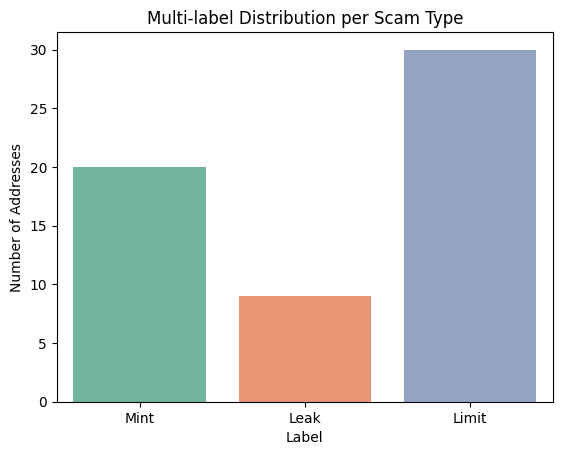

In [7]:
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")
plt.title("Multi-label Distribution per Scam Type")
plt.xlabel("Label")
plt.ylabel("Number of Addresses")
plt.show()

In [8]:
label_cols = ['Mint', 'Leak', 'Limit']
ground_df['label_combo'] = ground_df[label_cols].apply(
    lambda row: '+'.join([label for label in label_cols if row[label] == 1]) or 'None',
    axis=1
)

# Count combinations
combo_counts = ground_df['label_combo'].value_counts()
combo_counts

label_combo
None               27
Limit              15
Mint+Limit         10
Mint                8
Leak+Limit          4
Leak                3
Mint+Leak           1
Mint+Leak+Limit     1
Name: count, dtype: int64

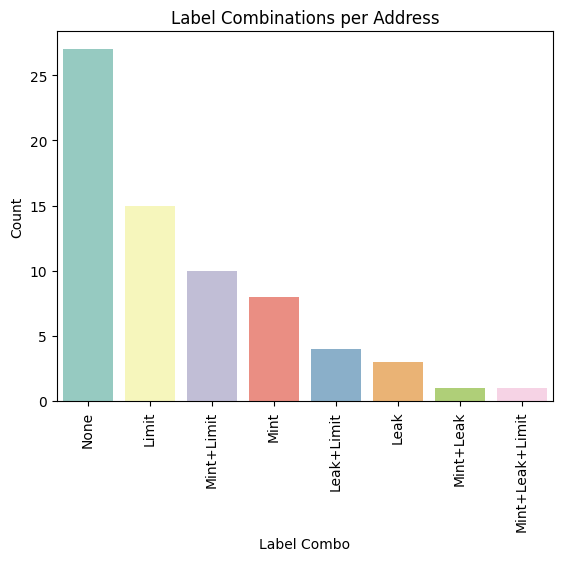

In [9]:
sns.barplot(x=combo_counts.index, y=combo_counts.values, palette="Set3")
plt.title("Label Combinations per Address")
plt.xlabel("Label Combo")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [10]:
mint_df = pd.read_excel(os.path.join(CRP_LARGE_PATH, 'mint.xlsx'))
mint_df.head()

,Address,TP?
0,0x0fef20d2c4ee011fa0389e69e9fa92a2291b63c8,Yes
1,0xd7cc0deb9dd11be95068bf2d7a3d082b8ba9bf04,Yes
2,0xa1b756be589441519b1a08e16bc4f60ab177d916,Yes
3,0x514bc174df04a4b04ae2be81ee8c788c3796b06b,Yes
4,0x1354c8c1a66c2573ce9cc3e92e98d17869501a46,Yes


<Axes: xlabel='TP?', ylabel='count'>

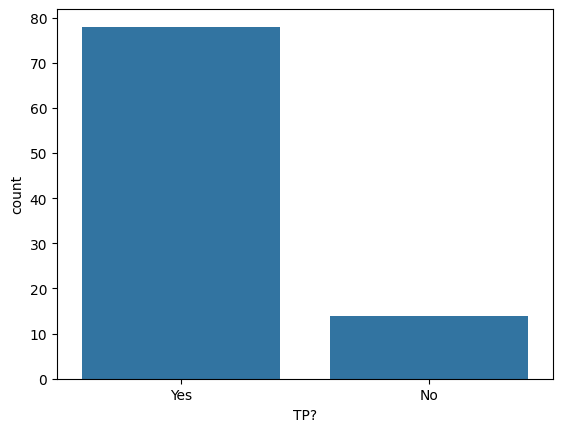

In [11]:
sns.countplot(mint_df, x='TP?')

In [12]:
leak_df = pd.read_excel(os.path.join(CRP_LARGE_PATH, 'leak.xlsx'))
leak_df.head()

,Address,TP?
0,0x0290ea3c728981725689187763f6c63a68e192b8,Yes
1,0x054ad3cd4a66f14bf5c0de2548a53be66995a4f6,Yes
2,0x0566c17dc2a9efcaa2f63e04cf06a69e8fc77f60,No
3,0x10c8324b20b7266c445944f043f53f6a77ea0bd4,Yes
4,0x10cc060f6f9b2e5dcdb23f1361e4b368a7daec73,Yes


<Axes: xlabel='TP?', ylabel='count'>

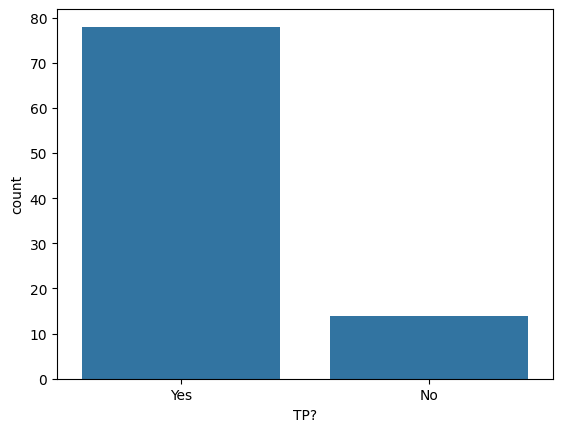

In [13]:
sns.countplot(mint_df, x='TP?')

In [14]:
limit_df = pd.read_excel(os.path.join(CRP_LARGE_PATH, 'limit.xlsx'))
limit_df.head()

,Address,TP?
0,0xe5f3c6d2b47cbe2cf936b9521466bac2422ebef8,Yes
1,0xa623b5a542c0d7daadef321042a04c600b03a8cb,Yes
2,0xe412189da2dfa188a1a61633114b8732bbbfba19,Yes
3,0x9fcf7acdc11fd904c4b73a009909c7f00efc4844,Yes
4,0x921a5dce3dfed5cccfbb2e593f2978533bc66110,Yes


<Axes: xlabel='TP?', ylabel='count'>

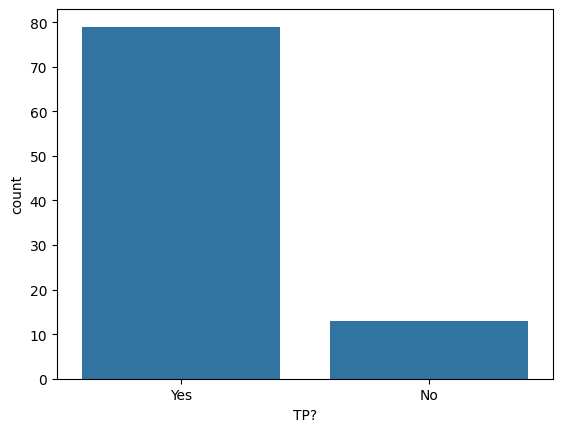

In [15]:
sns.countplot(limit_df, x='TP?')

In [16]:
opcode_df = pd.read_csv(os.path.join(DATA_PATH, 'trapdoordata/feature_dataset/opcode_feature_dataset.csv'))
opcode_df.head()

,address,PUSH14,AND,CALLER,JUMPI,CALLDATACOPY,PUSH11,DIFFICULTY,CALL,DUP4,...,GASLIMIT,CODESIZE,SHA3,DUP12,OR,PUSH25,CREATE2,EXTCODEHASH,REVERT,label
0,0x5674d4536fcd7a924696078b15865c4fab9f3597,0,243,7,102,4,0,0,0,76,...,2,0,49,1,13,0,0,0,47,1
1,0xbb7f05aa2dd33425ea0848cda8e4ea54718c6336,0,243,7,103,4,0,0,0,72,...,2,0,48,1,13,0,0,0,47,1
2,0x801427e0b00c5aa46f96550e1e33ad7f00077e19,0,243,7,102,4,0,0,0,76,...,2,0,48,1,13,0,0,0,47,1
3,0x1b49dc534fa67d0c23f6bd0601f8c8142f8306d0,0,243,7,102,4,0,0,0,76,...,2,0,48,1,13,0,0,0,48,1
4,0xf3afd0feac711f754d430de41ec0c7314a397ca1,0,243,7,102,4,0,0,0,77,...,2,0,48,1,13,0,0,0,47,1


<Axes: xlabel='label', ylabel='count'>

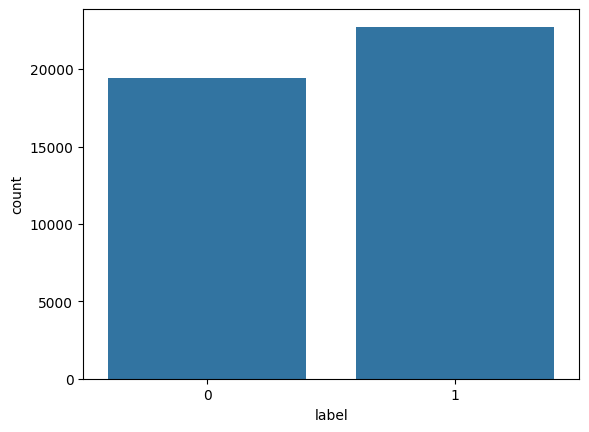

In [17]:
sns.countplot(opcode_df, x='label')

In [18]:
trapdoor_path = os.path.join(DATA_PATH, 'rphunter/Rug-Pull-incidents.xlsx')
trapdoor_total_df = pd.read_excel(trapdoor_path, engine='openpyxl', sheet_name="Total")
trapdoor_experiment_df = pd.read_excel(trapdoor_path, engine='openpyxl', sheet_name="Experiment")
trapdoor_total_df.head()

,Project Name,Chain,Address,Open Source,Sale Restrict,Variable Manipulation,Balance Tamper,Source
0,GMETA,BSC,0X93023F1D3525E273F291B6F76D2F5027A39BF302,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/BeosinAlert/status/1681240...
1,PokémonFi,BSC,0X2753DCE37A7EDB052A77832039BCC9AA49AD8B25,Yes,Address Restrict,NaN,NaN,https://twitter.com/CertiKAlert/status/1562555...
2,PokémonFi,BSC,0X0AA5CAE4D1C9230543542E998E04EA795EEDF738,Yes,Address Restrict,NaN,NaN,https://twitter.com/CertiKAlert/status/1562555...
3,Sudorare,ETH,0X5404EFAFDD8CC30053069DF2A1B0C4BA881B3E1E,Yes,NaN,NaN,Hidden Mint/Burn,https://x.com/PeckShieldAlert/status/156196749...
4,DRAC Network,ETH,0X10F6F2B97F3AB29583D9D38BABF2994DF7220C21,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/PeckShieldAlert/status/155...


In [19]:
trapdoor_experiment_df.head()

,Project Name,Chain,Address,Open Source,Sale Restrict,Variable Manipulation,Balance Tamper,Source
0,GMETA,BSC,0X93023F1D3525E273F291B6F76D2F5027A39BF302,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/BeosinAlert/status/1681240...
1,Sudorare,ETH,0X5404EFAFDD8CC30053069DF2A1B0C4BA881B3E1E,Yes,NaN,NaN,Hidden Mint/Burn,https://x.com/PeckShieldAlert/status/156196749...
2,DRAC Network,ETH,0X10F6F2B97F3AB29583D9D38BABF2994DF7220C21,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/PeckShieldAlert/status/155...
3,DHE,BSC,0X11CBC781DADAAD13FC3A361772C80B1C027820AF,Yes,Address Restrict,NaN,NaN,https://twitter.com/CertiKAlert/status/1539031...
4,ElonMVP,BSC,0X3E597EA168A85AA2AE5E2C4333665BCD875ED10F,Yes,Address Restrict,NaN,NaN,https://twitter.com/PeckShieldAlert/status/153...


In [20]:
trapdoor_total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Project Name           1047 non-null   object
 1   Chain                  1046 non-null   object
 2   Address                1035 non-null   object
 3   Open Source            1047 non-null   object
 4   Sale Restrict          290 non-null    object
 5   Variable Manipulation  160 non-null    object
 6   Balance Tamper         436 non-null    object
 7   Source                 1046 non-null   object
dtypes: object(8)
memory usage: 65.6+ KB


In [21]:
trapdoor_experiment_df.head()

,Project Name,Chain,Address,Open Source,Sale Restrict,Variable Manipulation,Balance Tamper,Source
0,GMETA,BSC,0X93023F1D3525E273F291B6F76D2F5027A39BF302,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/BeosinAlert/status/1681240...
1,Sudorare,ETH,0X5404EFAFDD8CC30053069DF2A1B0C4BA881B3E1E,Yes,NaN,NaN,Hidden Mint/Burn,https://x.com/PeckShieldAlert/status/156196749...
2,DRAC Network,ETH,0X10F6F2B97F3AB29583D9D38BABF2994DF7220C21,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/PeckShieldAlert/status/155...
3,DHE,BSC,0X11CBC781DADAAD13FC3A361772C80B1C027820AF,Yes,Address Restrict,NaN,NaN,https://twitter.com/CertiKAlert/status/1539031...
4,ElonMVP,BSC,0X3E597EA168A85AA2AE5E2C4333665BCD875ED10F,Yes,Address Restrict,NaN,NaN,https://twitter.com/PeckShieldAlert/status/153...


In [22]:
trapdoor_experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Project Name           645 non-null    object
 1   Chain                  645 non-null    object
 2   Address                645 non-null    object
 3   Open Source            645 non-null    object
 4   Sale Restrict          203 non-null    object
 5   Variable Manipulation  145 non-null    object
 6   Balance Tamper         190 non-null    object
 7   Source                 644 non-null    object
dtypes: object(8)
memory usage: 40.4+ KB


In [23]:
trapdoor_df = pd.concat([trapdoor_total_df, trapdoor_experiment_df])

In [24]:
trapdoor_df.duplicated(keep=False).value_counts()

True     1162
False     530
Name: count, dtype: int64

In [25]:
trapdoor_df = trapdoor_df.drop_duplicates(keep='first')

In [26]:
trapdoor_df['Sale Restrict'].value_counts()

Sale Restrict
Address Restrict                                           147
Amount Restrict                                             93
Address Restrict,Amount Restrict                            38
Address Restrict,TimeStamp Restrict                          6
Address Restrict,Amount Restrict,TimeStamp Restrict          4
\nAddress Restrict,Amount Restrict                           4
TimeStamp Restrict                                           2
\nAddress Restrict                                           2
Amount Restrict,TimeStamp Restrict                           1
Modifiable External Call                                     1
Address Restrict                                             1
Address Restrict,Address Restrict*3                          1
\n\nAddress Restrict,Amount Restrict,TimeStamp Restrict      1
\nAmount Restrict                                            1
TimeStanp Restrict                                           1
Name: count, dtype: int64

In [27]:
trapdoor_df['Variable Manipulation'].value_counts()

Variable Manipulation
Modifiable Tax Rate                                   87
Modifiable External Call                              46
Modifiable Tax Address                                18
Modifiable Tax Rate,Modifiable Tax Address             6
Modifibale Tax Rate                                    4
\nModifiable Tax Rate                                  2
Modifuable Tax Rate                                    1
Modifibale Tax Rate,Modifiable Tax Address             1
Modifiable Tax Address,Hidden Balance Modification     1
\n                                                     1
Modifiable Tax Address,Hidden Balance Modify           1
Name: count, dtype: int64

In [28]:
trapdoor_df['Balance Tamper'].value_counts()

Balance Tamper
Hidden Mint/Burn                                  334
Hidden Balance Modification                        54
Hidden Balance Modify                              46
\nHidden Mint/Burn                                 35
Hidden Mint/Burn,Hidden Balance Modification        6
Hidden Mint/Burn,Hidden Balance Modify              5
\n\nHidden Mint/Burn                                2
\n                                                  2
Hidden Mint/Eurn                                    1
Hidden Mint/Burn茂录聦Hidden Balance Modification      1
\n\n                                                1
Hidden Mint/Burn脙炉脗录脗聦Hidden Balance Modify         1
Name: count, dtype: int64

In [29]:
empty_cond = ((trapdoor_df['Balance Tamper'].isna())&(trapdoor_df['Variable Manipulation'].isna() )&(trapdoor_df['Sale Restrict'].isna() ))
trapdoor_df = trapdoor_df[~empty_cond]

In [30]:
trapdoor_df['Chain'].value_counts()

Chain
BSC         383
ETH         269
Polygon      72
Fantom       10
Arbitrum      4
OP.ETH        1
Cchain        1
BASE          1
Avax          1
Name: count, dtype: int64

In [31]:
trapdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 407
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Project Name           742 non-null    object
 1   Chain                  742 non-null    object
 2   Address                742 non-null    object
 3   Open Source            742 non-null    object
 4   Sale Restrict          303 non-null    object
 5   Variable Manipulation  168 non-null    object
 6   Balance Tamper         488 non-null    object
 7   Source                 742 non-null    object
dtypes: object(8)
memory usage: 52.2+ KB


In [32]:
def clean_balance_tamper(value):
    if pd.isna(value):
        return ''

    # Strip whitespace and linebreaks
    value = value.strip()

    # Replace multiple linebreaks or strange characters with a comma
    value = re.sub(r'[\n\r]+', ',', value)
    value = re.sub(r'[茂录聦]', ',', value)  # Remove strange unicode artifacts
    value = re.sub(r'[脙炉脗录脗聦]', ',', value)  # Remove strange unicode artifacts

    # Correct known typos
    value = value.replace("Hidden Mint/Eurn", "Hidden Mint/Burn")
    value = value.replace("Hidden Balance Modify", "Hidden Balance Modification")

    # Split by comma and normalize each part
    parts = [p.strip() for p in value.split(',') if p.strip()]

    # Deduplicate and sort for consistency
    parts = sorted(set(parts))

    return list(set(parts))

# Apply to both dataframes
trapdoor_df['Balance Tamper'] = trapdoor_df['Balance Tamper'].apply(clean_balance_tamper)

# Optional: show cleaned value counts
mlb = MultiLabelBinarizer()
tamper_encoded = pd.DataFrame(mlb.fit_transform(trapdoor_df['Balance Tamper']),
                              columns=mlb.classes_,
                              index=trapdoor_df.index)

trapdoor_df = pd.concat([trapdoor_df.drop(columns=['Balance Tamper']), tamper_encoded], axis=1)

In [33]:
trapdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 407
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project Name                 742 non-null    object
 1   Chain                        742 non-null    object
 2   Address                      742 non-null    object
 3   Open Source                  742 non-null    object
 4   Sale Restrict                303 non-null    object
 5   Variable Manipulation        168 non-null    object
 6   Source                       742 non-null    object
 7   Hidden Balance Modification  742 non-null    int64 
 8   Hidden Mint/Burn             742 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 58.0+ KB


In [34]:
def extract_sale_restrict_labels(value):
    if pd.isna(value) or not str(value).strip():
        return []

    value = re.sub(r'[\n\r]+', ',', value)

    # Fix known typos
    value = value.replace("TimeStanp Restrict", "TimeStamp Restrict")

    # Remove suffix like "*3" (e.g. Address Restrict*3)
    value = re.sub(r'\*[\d]+', '', value)

    # Split and clean
    parts = [p.strip() for p in value.split(',') if p.strip()]

    # Normalize duplicates
    parts = sorted(set(parts))
    return parts

# Apply label extraction
trapdoor_df['Sale Restrict'] = trapdoor_df['Sale Restrict'].apply(extract_sale_restrict_labels)

# Binarize
mlb_sale = MultiLabelBinarizer()

sale_encoded = pd.DataFrame(mlb_sale.fit_transform(trapdoor_df['Sale Restrict']),
                            columns=mlb_sale.classes_,
                            index=trapdoor_df.index)

# Drop original and concat
trapdoor_df = pd.concat([trapdoor_df.drop(columns=['Sale Restrict']), sale_encoded], axis=1)

In [35]:
trapdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 407
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project Name                 742 non-null    object
 1   Chain                        742 non-null    object
 2   Address                      742 non-null    object
 3   Open Source                  742 non-null    object
 4   Variable Manipulation        168 non-null    object
 5   Source                       742 non-null    object
 6   Hidden Balance Modification  742 non-null    int64 
 7   Hidden Mint/Burn             742 non-null    int64 
 8   Address Restrict             742 non-null    int64 
 9   Amount Restrict              742 non-null    int64 
 10  Modifiable External Call     742 non-null    int64 
 11  TimeStamp Restrict           742 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 75.4+ KB


In [36]:
def extract_variable_manipulation_labels(value):
    if pd.isna(value) or not str(value).strip():
        return []

    value = re.sub(r'[\n\r]+', ',', value)

    # Correct typos
    value = value.replace("Modifibale Tax Rate", "Modifiable Tax Rate")
    value = value.replace("Modifuable Tax Rate", "Modifiable Tax Rate")
    value = value.replace("Hidden Balance Modify", "")  # strip unrelated label

    # Split and clean
    parts = [p.strip() for p in value.split(',') if p.strip()]

    # Deduplicate
    parts = sorted(set(parts))
    return parts

# Apply function
trapdoor_df['Variable Manipulation'] = trapdoor_df['Variable Manipulation'].apply(extract_variable_manipulation_labels)

# Binarize
mlb_var = MultiLabelBinarizer()
var_encoded = pd.DataFrame(mlb_var.fit_transform(trapdoor_df['Variable Manipulation']),
                           columns=mlb_var.classes_,
                           index=trapdoor_df.index)

# Merge and drop
trapdoor_df = pd.concat([trapdoor_df.drop(columns=['Variable Manipulation']), var_encoded], axis=1)

In [37]:
trapdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 407
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project Name                 742 non-null    object
 1   Chain                        742 non-null    object
 2   Address                      742 non-null    object
 3   Open Source                  742 non-null    object
 4   Source                       742 non-null    object
 5   Hidden Balance Modification  742 non-null    int64 
 6   Hidden Mint/Burn             742 non-null    int64 
 7   Address Restrict             742 non-null    int64 
 8   Amount Restrict              742 non-null    int64 
 9   Modifiable External Call     742 non-null    int64 
 10  TimeStamp Restrict           742 non-null    int64 
 11  Hidden Balance Modification  742 non-null    int64 
 12  Modifiable External Call     742 non-null    int64 
 13  Modifiable Tax Address       742 non-nul

In [38]:
trapdoor_df = trapdoor_df.loc[:,~trapdoor_df.columns.duplicated()].copy()

In [39]:
trapdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 407
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project Name                 742 non-null    object
 1   Chain                        742 non-null    object
 2   Address                      742 non-null    object
 3   Open Source                  742 non-null    object
 4   Source                       742 non-null    object
 5   Hidden Balance Modification  742 non-null    int64 
 6   Hidden Mint/Burn             742 non-null    int64 
 7   Address Restrict             742 non-null    int64 
 8   Amount Restrict              742 non-null    int64 
 9   Modifiable External Call     742 non-null    int64 
 10  TimeStamp Restrict           742 non-null    int64 
 11  Modifiable Tax Address       742 non-null    int64 
 12  Modifiable Tax Rate          742 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 81.

In [40]:
trapdoor_df.select_dtypes('int64').columns

Index(['Hidden Balance Modification', 'Hidden Mint/Burn', 'Address Restrict',
       'Amount Restrict', 'Modifiable External Call', 'TimeStamp Restrict',
       'Modifiable Tax Address', 'Modifiable Tax Rate'],
      dtype='object')

In [41]:
label_cols = trapdoor_df.select_dtypes('int64').columns.tolist()

In [42]:
trapdoor_df.to_csv(os.path.join(PATH, 'data/interim/trapdoor.csv'), columns=['Address']+label_cols)

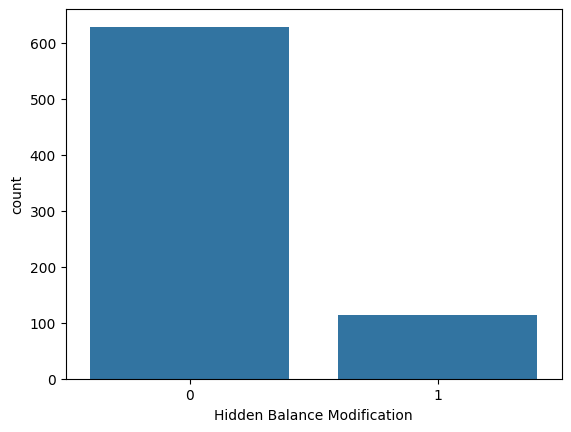

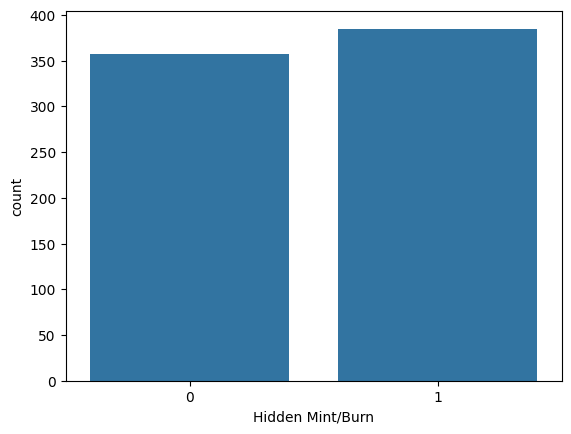

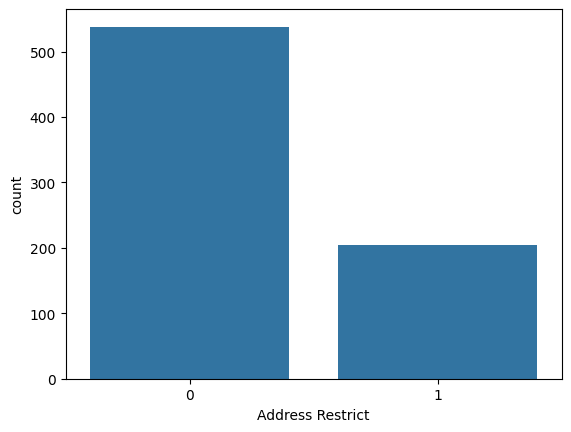

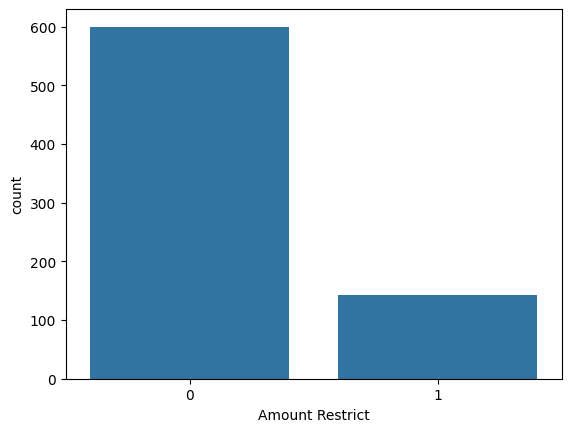

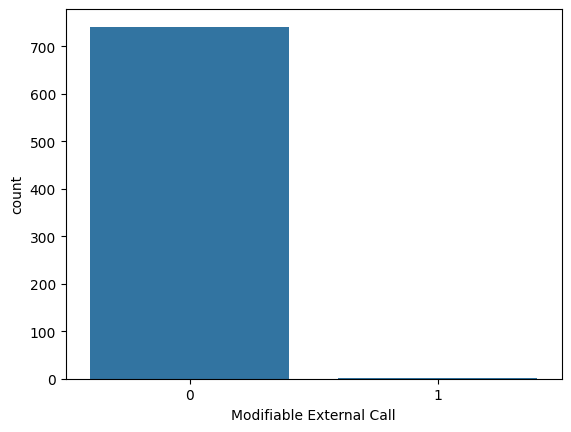

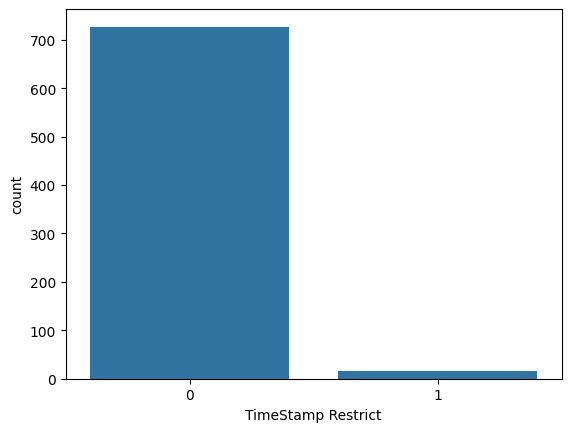

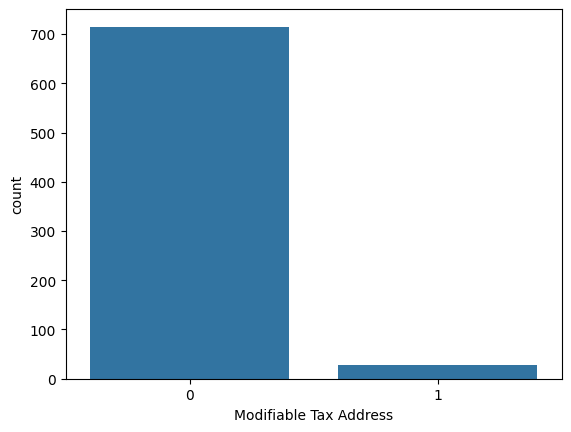

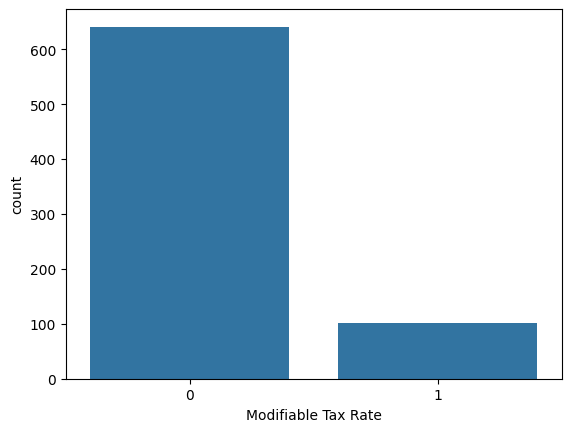

In [50]:
for label in label_cols:
    sns.countplot(trapdoor_df, x=label)
    plt.show()

In [44]:
ground_df = ground_df.rename(columns={'address': 'Address'})
opcode_df = opcode_df.rename(columns={'address': 'Address'})

In [45]:
ground_df.columns

Index(['Address', 'Mint', 'Leak', 'Limit', 'label_combo'], dtype='object')

In [46]:
df_opcode = pd.read_csv(os.path.join(DATA_PATH, 'trapdoordata/feature_dataset/AL_opcode_feature_dataset.csv'))
df_opcode.head()


,address,PUSH14,AND,CALLER,JUMPI,CALLDATACOPY,PUSH11,DIFFICULTY,CALL,DUP4,...,GASLIMIT,CODESIZE,SHA3,DUP12,OR,PUSH25,CREATE2,EXTCODEHASH,REVERT,label
0,0x5674d4536fcd7a924696078b15865c4fab9f3597,0,243,7,102,4,0,0,0,76,...,2,0,49,1,13,0,0,0,47,0
1,0xbb7f05aa2dd33425ea0848cda8e4ea54718c6336,0,243,7,103,4,0,0,0,72,...,2,0,48,1,13,0,0,0,47,0
2,0x801427e0b00c5aa46f96550e1e33ad7f00077e19,0,243,7,102,4,0,0,0,76,...,2,0,48,1,13,0,0,0,47,0
3,0x1b49dc534fa67d0c23f6bd0601f8c8142f8306d0,0,243,7,102,4,0,0,0,76,...,2,0,48,1,13,0,0,0,48,0
4,0xf3afd0feac711f754d430de41ec0c7314a397ca1,0,243,7,102,4,0,0,0,77,...,2,0,48,1,13,0,0,0,47,0


## Show overlap of addresses across datasets

In [47]:
addr_ground = clean_addresses(ground_df)
addr_mint = clean_addresses(mint_df)
addr_leak = clean_addresses(leak_df)
addr_limit = clean_addresses(limit_df)
addr_opcode = clean_addresses(opcode_df)
addr_trapdoor = clean_addresses(trapdoor_df)


In [48]:
print("Total groundTruth:", len(addr_ground))
print("Total mint:", len(addr_mint))
print("Total leak:", len(addr_leak))
print("Total limit:", len(addr_limit))
print("Total rphunter:", len(addr_opcode))
print("Total trapdoor:", len(addr_trapdoor))

print("\nOverlaps:")
print("ground ∩ rphunter:", len(addr_ground & addr_opcode))
print("mint ∩ rphunter:", len(addr_mint & addr_opcode))
print("leak ∩ rphunter:", len(addr_leak & addr_opcode))
print("limit ∩ rphunter:", len(addr_limit & addr_opcode))
print("trapdoor ∩ rphunter:", len(addr_trapdoor & addr_opcode))

print("mint ∩ ground:", len(addr_mint & addr_ground))
print("leak ∩ ground:", len(addr_leak & addr_ground))
print("limit ∩ ground:", len(addr_limit & addr_ground))
print("trapdoor ∩ ground:", len(addr_trapdoor & addr_ground))

print("leak ∩ mint:", len(addr_leak & addr_mint))
print("limit ∩ mint:", len(addr_limit & addr_mint))
print("trapdoor ∩ mint:", len(addr_trapdoor & addr_mint))

print("limit ∩ leak:", len(addr_limit & addr_leak))
print("trapdoor ∩ leak:", len(addr_trapdoor & addr_leak))

Total groundTruth: 69
Total mint: 92
Total leak: 87
Total limit: 91
Total rphunter: 42172
Total trapdoor: 689

Overlaps:
ground ∩ rphunter: 1
mint ∩ rphunter: 1
leak ∩ rphunter: 0
limit ∩ rphunter: 0
trapdoor ∩ rphunter: 76
mint ∩ ground: 0
leak ∩ ground: 0
limit ∩ ground: 0
trapdoor ∩ ground: 28
leak ∩ mint: 2
limit ∩ mint: 2
trapdoor ∩ mint: 0
limit ∩ leak: 1
trapdoor ∩ leak: 0


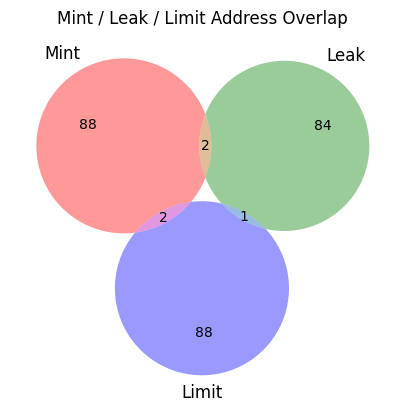

In [49]:
venn3([addr_mint, addr_leak, addr_limit], ('Mint', 'Leak', 'Limit'))
plt.title("Mint / Leak / Limit Address Overlap")
plt.show()

In [ ]:
# All sets (assumed already lowercase & stripped)
all_sets = [
    addr_ground,
    addr_mint,
    addr_leak,
    addr_limit,
    addr_opcode,
    addr_trapdoor,
]

# Combine them using set union
all_unique_addresses = set().union(*all_sets)

print(f"Total unique addresses (no duplicates): {len(all_unique_addresses)}")


✅ Total unique addresses (no duplicates): 43089
